**Andrea Natania - PYTN-KS17-04**

# Import Packages

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import statistics
from scipy.stats import friedmanchisquare

pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set(style='darkgrid')
params = {'font.family': 'Times New Roman', 'axes.labelsize': 12, 'xtick.labelsize': 12, 
          'ytick.labelsize': 12, 'axes.labelweight': 'bold'}
plt.rcParams.update(params)

# Import Dataset

In [2]:
df = pd.read_csv('nyc-rolling-sales.csv', na_values =[' -  '])
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,,10309,0,1,1,10796.0,2400.0,2006,4,P9,69300.0,2016-10-27 00:00:00


# Check Data Type

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            84548 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       84548 non-null  object 
 8   BUILDING CLASS AT PRESENT       84548 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                84548 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

In [4]:
#change sale date to date time type
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

# Check Missing Values

In [5]:
df.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [6]:
#fill nan values with median
land_square_feet_median = df['LAND SQUARE FEET'].median()
gross_square_feet_median = df['GROSS SQUARE FEET'].median()
sale_price_median = df['SALE PRICE'].median()
df['LAND SQUARE FEET'].fillna(land_square_feet_median, inplace=True)
df['GROSS SQUARE FEET'].fillna(gross_square_feet_median, inplace=True)
df['SALE PRICE'].fillna(sale_price_median, inplace=True)

# Drop Unnecessary Column

In [7]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.tail()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21
84547,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,,10309,0,1,1,10796.0,2400.0,2006,4,P9,69300.0,2016-10-27


In [8]:
grouped = df.groupby(['BOROUGH']).agg({'SALE PRICE':'sum'}).sort_values(by='SALE PRICE',
                                                                              ascending=False).reset_index()
grouped

,BOROUGH,SALE PRICE
0,1,5.024619e+10
1,3,2.006694e+10
2,4,1.804100e+10
3,5,4.538281e+09
4,2,4.160275e+09


Dari groupby diatas, didapatkan bahwa borough dengan sale price tertinggi adalah Manhattan. Maka dari itu, akan dilakukan perhitungan criteria dari borough Manhattan.

# A. Mean

**Berapakah rata-rata SALE PRICE di Manhattan?**

In [9]:
mean_sale_price = df[df['BOROUGH']==1]['SALE PRICE'].mean()
mean_sale_price

2744793.4228668194

Rata-rata dari SALE PRICE di Manhattan adalah sebesar 2744793.42

# B. Median

**Berapakah median dari SALE PRICE Manhattan?**

In [10]:
median_sale_price = df[df['BOROUGH']==1]['SALE PRICE'].median()
median_sale_price

835500.0

Median sale price di Manhattan adalah sebesar 835500

# C. Modus

**Berapakah modus dari SALE PRICE di Manhattan?**

In [11]:
df[df['BOROUGH']==1]['SALE PRICE'].mode()

0    530000.0
Name: SALE PRICE, dtype: float64

Modus sale price di Manhattan adalah sebesar 530000

# D. Range

**Berapakah range dari SALE PRICE di Manhattan?**

In [12]:
max_sale_price = df[df['BOROUGH']==1]['SALE PRICE'].max()
min_sale_price = df[df['BOROUGH']==1]['SALE PRICE'].min()
range_sale_price = max_sale_price - min_sale_price

print('Max Sale Price in Manhattan :', max_sale_price)
print('Min Sale Price in Manhattan :', min_sale_price)
print('Range Sale Price in Manhattan :', range_sale_price)

Max Sale Price in Manhattan : 2210000000.0
Min Sale Price in Manhattan : 1.0
Range Sale Price in Manhattan : 2209999999.0


Range Sale Price di Manhattan dapat dibilang signifikan. Hal ini dapat disebabkan oleh luas tanah dan juga jenis properti yang dijual di Manhattan.

# E. Variance

**Berapakah varians dari SALE PRICE di Manhattan?**

In [13]:
df[df['BOROUGH']==1]['SALE PRICE'].var()

459341183405697.3

Variance sale price di Manhattan adalah sebesar 459341183405697.3. Hasil varians yang didapatkan lebih besar dari mean karena adanya nilai range yang cukup signifikan.

# F. Standard Deviation

**Berapakah standard deviation dari SALE PRICE di Manhattan?**

In [14]:
stdev_sale_price = df[df['BOROUGH']==1]['SALE PRICE'].std()
stdev_sale_price

21432246.345301684

Standard deviation dari sale price di manhattan adalah sebesar 21432246.34

# G. Probability Distribution

**Bagaimana distribusi dari SALE PRICE di Manhattan?**

In [15]:
from statsmodels.stats.diagnostic import normal_ad

In [16]:
p_value = normal_ad(df[df['BOROUGH']==1]['SALE PRICE'])[1]
p_value

C:\Users\andre\anaconda3\Lib\site-packages\statsmodels\stats\_adnorm.py:67: RuntimeWarning: divide by zero encountered in log1p
  s = np.sum((2 * i[sl1] - 1.0) / nobs * (np.log(z) + np.log1p(-z[sl2])),


0.0

C:\Users\andre\AppData\Local\Temp\ipykernel_5396\2774207948.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['BOROUGH']==1]['SALE PRICE'])


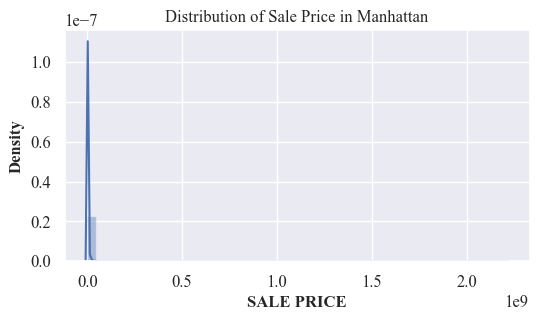

In [17]:
plt.subplots(figsize=(6,3))
plt.title('Distribution of Sale Price in Manhattan', fontsize=12)
sns.distplot(df[df['BOROUGH']==1]['SALE PRICE'])
plt.show()

P value yang didapatkan diatas lebih kecil dari 0.05, karena itu sale price di Manhattan tidak normally distributed. Selain itu, distribusi sale price di Manhattan adalah right skewed.

# H. Confidence Intervals

**Bagaimana confidence interval dari SALE PRICE di Manhattan?**

In [18]:
n = len(df[df['BOROUGH']==1])
z = 1.96

In [19]:
upper_bound = mean_sale_price + (z*(stdev_sale_price/np.sqrt(n)))
lower_bound = mean_sale_price - (z*(stdev_sale_price/np.sqrt(n)))
upper_bound, lower_bound

(3055268.708152911, 2434318.1375807277)

Rata-rata dari sale price di Manhattan berada di rentang harga 2434318.14 hingga 3055268.71 dengan confidence 95%

# I. Hypothesis Testing

**Apakah distribusi SALE PRICE dari Borough Manhattan sama dengan borough lainnya?**

$H0$ : Distribusi sale price Manhattan sama dengan distribusi borough lainnya</br>
$H1$ : Distribusi sale price Manhattan tidak sama dengan distribusi borough lainnya

In [20]:
sale_price_borough_1 = df[df['BOROUGH']==1]['SALE PRICE'].sample(1000, random_state=1).to_list()
sale_price_borough_2 = df[df['BOROUGH']==2]['SALE PRICE'].sample(1000, random_state=1).to_list()
sale_price_borough_3 = df[df['BOROUGH']==3]['SALE PRICE'].sample(1000, random_state=1).to_list()
sale_price_borough_4 = df[df['BOROUGH']==4]['SALE PRICE'].sample(1000, random_state=1).to_list()
sale_price_borough_5 = df[df['BOROUGH']==5]['SALE PRICE'].sample(1000, random_state=1).to_list()

In [21]:
stat, p = friedmanchisquare(sale_price_borough_1, sale_price_borough_2, sale_price_borough_3, sale_price_borough_4, sale_price_borough_5)
print(stat, p)

911.0624011429168 6.680111643031408e-196


In [22]:
if p>0.05: print("Distribusi sale price Manhattan sama dengan distribusi borough lainnya")
else: print('Distribusi sale price Manhattan tidak sama dengan distribusi borough lainnya')

Distribusi sale price Manhattan tidak sama dengan distribusi borough lainnya


Karena p lebih kecil dari 0.05, maka H0 ditolak. Maka dari itu, Distribusi sale price Manhattan tidak sama dengan distribusi borough lainnya